In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
df1=pd.read_csv('bank_marketing.csv',sep=';')
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
df2= pd.read_csv('bank_additional_full.csv', sep=';')
df2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [13]:
# df.columns=col
# df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [7]:
# df=pd.read_csv('bank_marketing.csv')
# df

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."
...,...
45206,"51;""technician"";""married"";""tertiary"";""no"";825;..."
45207,"71;""retired"";""divorced"";""primary"";""no"";1729;""n..."
45208,"72;""retired"";""married"";""secondary"";""no"";5715;""..."
45209,"57;""blue-collar"";""married"";""secondary"";""no"";66..."


In [27]:
# df.columns

Index(['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'], dtype='object')

In [8]:
# text=df.columns[0]  # to confirm there is only 1 column created string for saggregate it.
# text

'age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'

In [9]:
# col=text.replace('"','').split(';')    # to convert into list
# col

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [10]:
# df.columns=col # cant change column name due to only one column available and we are giving 17 column names for that 
# we have to seperate row data

ValueError: Length mismatch: Expected axis has 1 elements, new values have 17 elements

In [30]:
# text=df.iloc[1:2] 

In [ ]:
# pd.read_json('bank_marketing.csv')

In [10]:
# dict1=df.to_dict()
# dict2=dict1['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"']
# dict2

{0: '58;"management";"married";"tertiary";"no";2143;"yes";"no";"unknown";5;"may";261;1;-1;0;"unknown";"no"',
 1: '44;"technician";"single";"secondary";"no";29;"yes";"no";"unknown";5;"may";151;1;-1;0;"unknown";"no"',
 2: '33;"entrepreneur";"married";"secondary";"no";2;"yes";"yes";"unknown";5;"may";76;1;-1;0;"unknown";"no"',
 3: '47;"blue-collar";"married";"unknown";"no";1506;"yes";"no";"unknown";5;"may";92;1;-1;0;"unknown";"no"',
 4: '33;"unknown";"single";"unknown";"no";1;"no";"no";"unknown";5;"may";198;1;-1;0;"unknown";"no"',
 5: '35;"management";"married";"tertiary";"no";231;"yes";"no";"unknown";5;"may";139;1;-1;0;"unknown";"no"',
 6: '28;"management";"single";"tertiary";"no";447;"yes";"yes";"unknown";5;"may";217;1;-1;0;"unknown";"no"',
 7: '42;"entrepreneur";"divorced";"tertiary";"yes";2;"yes";"no";"unknown";5;"may";380;1;-1;0;"unknown";"no"',
 8: '58;"retired";"married";"primary";"no";121;"yes";"no";"unknown";5;"may";50;1;-1;0;"unknown";"no"',
 9: '43;"technician";"single";"seconda

In [11]:
dict3={}
for i in range(len(dict2)):
    
    dict3[i]=dict2[i].replace('"','').split(';')
    


In [12]:
# df=pd.DataFrame.from_dict(dict3).T
# df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [36]:
# dict2[0].replace('"','').split(';')

['58',
 'management',
 'married',
 'tertiary',
 'no',
 '2143',
 'yes',
 'no',
 'unknown',
 '5',
 'may',
 '261',
 '1',
 '-1',
 '0',
 'unknown',
 'no']

In [37]:
# data = {'name': ['nick', 'david', 'joe', 'ross'],
#         'age': ['5', '10', '7', '6']} 
# new = pd.DataFrame.from_dict(data)
  
# new

,name,age
0,nick,5
1,david,10
2,joe,7
3,ross,6


In [5]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


C:\Users\amolc\AppData\Local\Temp\ipykernel_12296\272655420.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(),annot=True)


<Axes: >

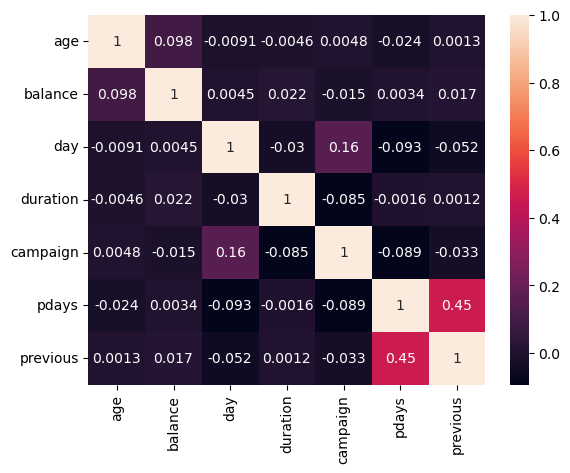

In [7]:
sns.heatmap(df1.corr(),annot=True)

In [8]:
pd.get_dummies(df1['y'],drop_first=True)

,yes
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [ ]:
#process
1.categorical to numerical thu encoding
2. check heatmap
3. droping non imp cols
4.

In [9]:
df1.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [10]:
df1.corr()

C:\Users\amolc\AppData\Local\Temp\ipykernel_12296\473017434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [11]:
df1.day.value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [12]:
df1.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [13]:
df1.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [14]:
df1.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [15]:
df1.poutcome.value_counts()#one

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [16]:
df1.job.value_counts()# Label encoding

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [17]:
df1['balance']=df1['balance'].astype('int')

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int32 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int32(1), int64(6), object(10)
memory usage: 5.7+ MB


In [19]:
df1[['balance','age','day','duration','campaign','pdays','previous']]=df1[['balance','age','day','duration','campaign','pdays','previous']].astype('int')


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int32 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int32 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int32 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int32 
 12  campaign   45211 non-null  int32 
 13  pdays      45211 non-null  int32 
 14  previous   45211 non-null  int32 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int32(7), object(10)
memory usage: 4.7+ MB


In [21]:
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [22]:
df1.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int32 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int32 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int32 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int32 
 12  campaign   45211 non-null  int32 
 13  pdays      45211 non-null  int32 
 14  previous   45211 non-null  int32 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int32(7), object(10)
memory usage: 4.7+ MB


In [25]:
marry=pd.get_dummies(df1.marital,drop_first=True)
marry

,married,single
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
45206,1,0
45207,0,0
45208,1,0
45209,1,0


In [26]:
label_encoder = preprocessing.LabelEncoder()

In [27]:
df1['job']= label_encoder.fit_transform(df1['job'])
df1['job'].unique()

array([ 4,  9,  2,  1, 11,  5,  0,  7,  6, 10,  3,  8])

In [28]:
df1['marital']= label_encoder.fit_transform(df1['marital'])
df1['marital'].unique()

array([1, 2, 0])

In [29]:
df1['education']= label_encoder.fit_transform(df1['education'])
df1['education'].unique()

array([2, 1, 3, 0])

In [30]:
df1['default']= label_encoder.fit_transform(df1['default'])
df1['default'].unique()

array([0, 1])

In [31]:
df1['housing']= label_encoder.fit_transform(df1['housing'])
df1['housing'].unique()

array([1, 0])

In [32]:
df1['loan']= label_encoder.fit_transform(df1['loan'])
df1['loan'].unique()

array([0, 1])

In [33]:
df1['month']= label_encoder.fit_transform(df1['month'])
df1['month'].unique()

array([ 8,  6,  5,  1, 10,  9,  2,  4,  3,  7,  0, 11])

In [34]:
df1['poutcome']= label_encoder.fit_transform(df1['poutcome'])
df1['poutcome'].unique()

array([3, 0, 1, 2])

In [35]:
df1['y']= label_encoder.fit_transform(df1['y'])
df1['y'].unique()

array([0, 1])

In [36]:
df1['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [37]:
df1['contact']=df1['contact'].replace({'unknown':'cellular'})
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,cellular,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,cellular,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,cellular,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,cellular,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,cellular,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,cellular,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,cellular,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,cellular,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,telephone,17,9,508,4,-1,0,3,0


In [38]:
df1['contact']= label_encoder.fit_transform(df1['contact'])
df1['contact'].unique()

array([0, 1])

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int32
 1   job        45211 non-null  int32
 2   marital    45211 non-null  int32
 3   education  45211 non-null  int32
 4   default    45211 non-null  int32
 5   balance    45211 non-null  int32
 6   housing    45211 non-null  int32
 7   loan       45211 non-null  int32
 8   contact    45211 non-null  int32
 9   day        45211 non-null  int32
 10  month      45211 non-null  int32
 11  duration   45211 non-null  int32
 12  campaign   45211 non-null  int32
 13  pdays      45211 non-null  int32
 14  previous   45211 non-null  int32
 15  poutcome   45211 non-null  int32
 16  y          45211 non-null  int32
dtypes: int32(17)
memory usage: 2.9 MB


In [40]:
df1.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.170349,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.002573,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.020524,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.044168,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,-0.017208,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,0.037999,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,-0.080822,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.013183,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.170349,-0.002573,-0.020524,-0.044168,-0.017208,0.037999,-0.080822,-0.013183,1.000000,0.023652,-0.004616,-0.023201,0.053895,0.016006,0.028097,-0.019176,0.014042
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,0.023652,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


<Axes: >

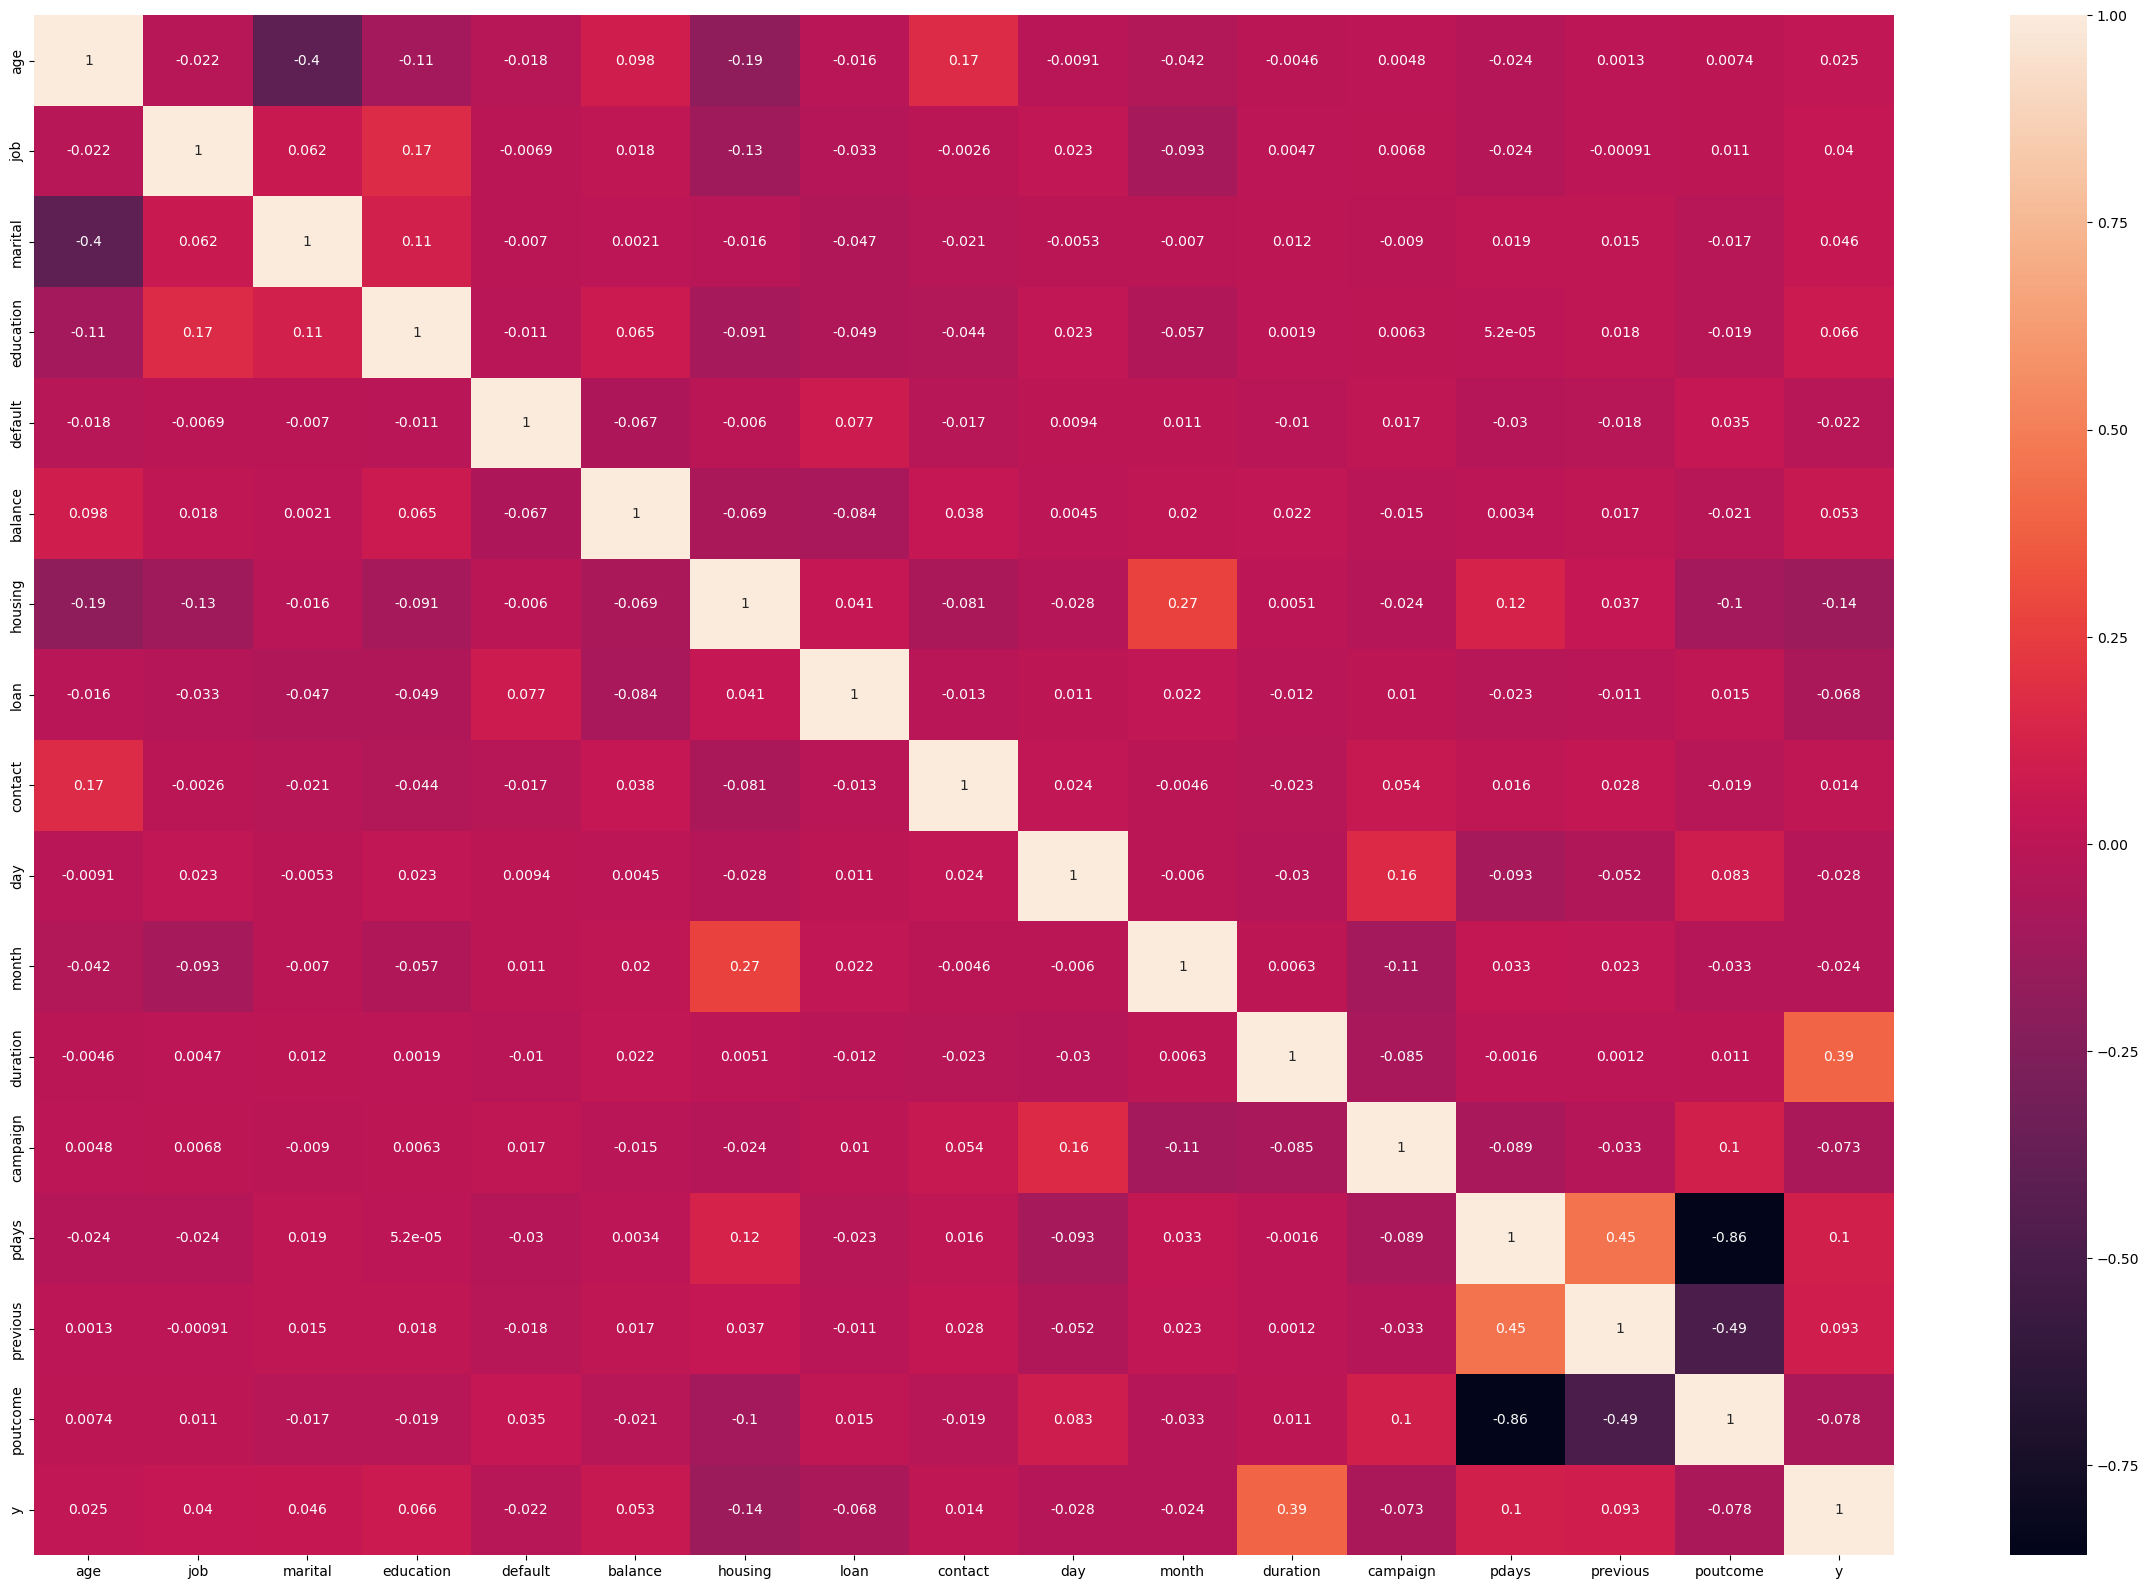

In [41]:
plt.figure(figsize = (30,20))
sns.heatmap(df1.corr(), annot = True)

In [42]:
x = df1.drop('y', axis = 1)
y = df1['y']

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=1, stratify=y)

In [45]:
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

y_pred = log_model.predict(x_test)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [82]:
accuracy_score(y_test,y_pred)

0.8876479044564857

In [83]:
confusion_matrix(y_test,y_pred)

array([[7846,  139],
       [ 877,  181]], dtype=int64)

In [84]:
clf_report = classification_report(y_test,y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7985
           1       0.57      0.17      0.26      1058

    accuracy                           0.89      9043
   macro avg       0.73      0.58      0.60      9043
weighted avg       0.86      0.89      0.86      9043



In [85]:
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

y_pred1 = log_model.predict(x_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [86]:
accuracy_score(y_train,y_pred1)

0.8879119663791196

In [87]:
clf_report = classification_report(y_test,y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7985
           1       0.57      0.17      0.26      1058

    accuracy                           0.89      9043
   macro avg       0.73      0.58      0.60      9043
weighted avg       0.86      0.89      0.86      9043



In [89]:
decisionclass=DecisionTreeClassifier()
decisionclass.fit(x_train,y_train)


DecisionTreeClassifier()

In [ ]:
y_pred2=decisionclass.predict()

In [91]:
decisionclass.score(x_test,y_test)

0.8681853367245383

In [93]:
random=RandomForestClassifier()


In [94]:
random.fit(x_train,y_train)


RandomForestClassifier()

In [95]:
random.score(x_test,y_test)

0.9033506579674887

In [96]:
random.score(x_train,y_train)

0.999944702499447